In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
df.isnull().sum()

## to delete the null value 
df.dropna(inplace=True)
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [7]:
loyal_customer = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customer = df[df["Customer Type"] == "disloyal Customer"]

In [8]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [9]:
balance_df = pd.concat([loyal_customer,disloyal_customer],axis = 0)
balance_df.shape

(38905, 12)

In [10]:
cat_col = balance_df.select_dtypes(include=["object"])
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
44807,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
83960,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied
97376,Male,Loyal Customer,Business travel,Business,satisfied
47499,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
64730,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied


In [11]:
## for numerical column 
num_col = balance_df.select_dtypes(exclude="object")
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
44807,44,349,5,5,5,0,0.0
83960,42,627,2,2,4,0,0.0
97376,32,404,5,1,5,23,0.0
47499,66,595,5,4,5,0,0.0
64730,48,1024,3,3,1,0,15.0


In [12]:
pd.get_dummies(cat_col).head() ## answer in true or false 

## if want in integer or other datatype
pd.get_dummies(cat_col).astype(int).head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
44807,0,1,1,0,0,1,0,1,0,1,0
83960,1,0,1,0,1,0,0,1,0,1,0
97376,0,1,1,0,1,0,1,0,0,0,1
47499,0,1,1,0,0,1,0,1,0,1,0
64730,1,0,1,0,1,0,0,1,0,1,0


In [13]:
pd.get_dummies(cat_col,drop_first=True).astype(int).head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
44807,1,0,1,1,0,0
83960,0,0,0,1,0,0
97376,1,0,0,0,0,1
47499,1,0,1,1,0,0
64730,0,0,0,1,0,0


In [14]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder 
ohe = OneHotEncoder(drop="if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], shape=(38905, 7))

In [15]:
column_name = ohe.get_feature_names_out()
column_name

array(['Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'satisfaction_satisfied'], dtype=object)

In [16]:
one_hot = pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
one_hot = one_hot.reset_index(drop=True)
num_col = num_col.reset_index(drop=True)
final_df = pd.concat([one_hot,num_col], axis = 1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,44,349,5,5,5,0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42,627,2,2,4,0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,32,404,5,1,5,23,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,66,595,5,4,5,0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,48,1024,3,3,1,0,15.0


In [18]:
## x and y ---> train test split ---> algorithm training 
matrix = final_df.corr()
matrix

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Gender_Male,1.000000,-0.043184,0.019124,0.017750,-0.001683,-0.033709,0.021391,0.016241,0.008321,0.009432,0.026751,0.007852,0.005994,0.002383
Customer Type_disloyal Customer,-0.043184,1.000000,-0.467565,-0.103921,0.145455,-0.089374,-0.247748,-0.381625,-0.322300,-0.138068,0.030757,-0.104788,0.006898,0.007804
Type of Travel_Personal Travel,0.019124,-0.467565,1.000000,-0.374461,0.324423,0.100211,-0.269135,0.078764,-0.119606,-0.064670,-0.029411,-0.025524,-0.017295,-0.018342
Class_Business,0.017750,-0.103921,-0.374461,1.000000,-0.887394,-0.223169,0.438923,0.170501,0.370985,0.134965,0.239205,0.091097,-0.012903,-0.017471
Class_Eco,-0.001683,0.145455,0.324423,-0.887394,1.000000,-0.251346,-0.396883,-0.179653,-0.332404,-0.124908,-0.201899,-0.084502,0.010036,0.013448
Class_Eco Plus,-0.033709,-0.089374,0.100211,-0.223169,-0.251346,1.000000,-0.082337,0.021897,-0.076039,-0.019250,-0.075308,-0.012584,0.005871,0.008245
satisfaction_satisfied,0.021391,-0.247748,-0.269135,0.438923,-0.396883,-0.082337,1.000000,0.126418,0.271059,0.282216,0.224773,0.214115,-0.036552,-0.043509
Age,0.016241,-0.381625,0.078764,0.170501,-0.179653,0.021897,0.126418,1.000000,0.140352,0.081219,-0.043623,0.058149,-0.002522,-0.004212
Flight Distance,0.008321,-0.322300,-0.119606,0.370985,-0.332404,-0.076039,0.271059,0.140352,1.000000,0.116923,0.050468,0.084757,0.006736,0.000293
Inflight entertainment,0.009432,-0.138068,-0.064670,0.134965,-0.124908,-0.019250,0.282216,0.081219,0.116923,1.000000,0.241810,0.802371,-0.019404,-0.022278


<Axes: >

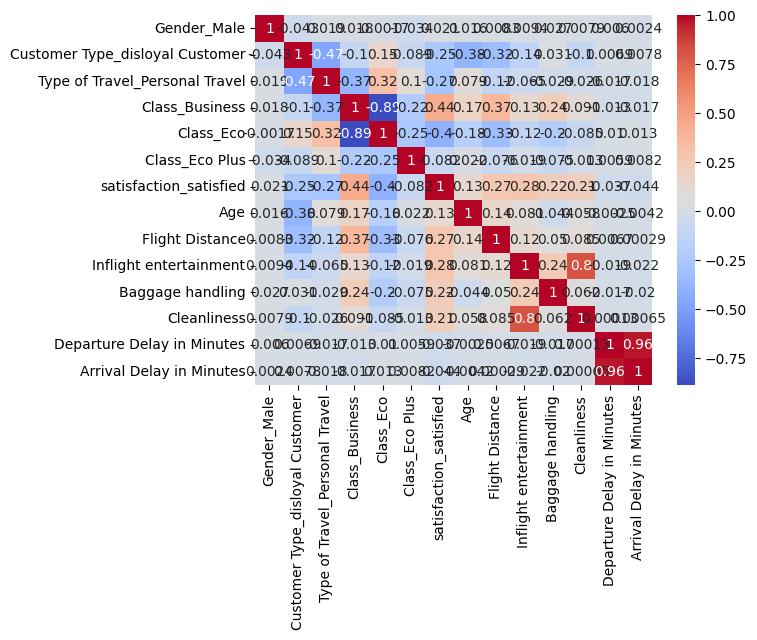

In [19]:
sns.heatmap(matrix,annot=True, cmap="coolwarm")

In [24]:
## training and testing 
from sklearn.model_selection import train_test_split 
# Assume you have a DataFrame called df
x = df.drop('satisfaction', axis=1)  # all columns except target
y = df['satisfaction']               # target column

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
